In [61]:
! pip install numpy pandas scikit-Learn matplotlib seaborn cloudpickle streamlit

Import Libraries

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import cloudpickle
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix, roc_auc_score, accuracy_score
import cloudpickle
import os # It's good practice to check if the file exists first


Function to read Data

In [41]:
def read_data(path):
    try:
        df = pd.read_csv(path)
        print(f"Successfully Read The Data")
        return df
    except Exception as e:
        print(f"Error While Reading Data: {e}")
        return None

Function to split data into train and test sets

In [42]:
def split_data(df, test_size, target):
    try:
        y = df[target].copy()
        x = df.drop(columns=[target])
        x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=42, stratify=y)
        x_train.reset_index(drop=True, inplace=True)
        x_test.reset_index(drop=True, inplace=True)
        x_train.reset_index(drop=True, inplace=True)
        x_test.reset_index(drop=True, inplace=True)
        print(f"Successfully Split The Data")
        return x_train, x_test, y_train, y_test 
    except Exception as e:
        print(f"Failed To Split The Data: {e}")
        return None     

Reading the Data

In [43]:
data = read_data("Telco_Customer_Churn.csv")

Successfully Read The Data


In [44]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


splitting the Data

In [45]:
data_splits = split_data(df=data, test_size=0.2, target="Churn")
if data_splits is not None:
    x_train, x_test, y_train, y_test = data_splits

Successfully Split The Data


In [46]:
print(f"x_train.shape = {x_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"x_test.shape = {x_test.shape}")
print(f"y_test.shape = {y_test.shape}")

x_train.shape = (5634, 20)
y_train.shape = (5634,)
x_test.shape = (1409, 20)
y_test.shape = (1409,)


EDA

In [47]:
x_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55


In [48]:
x_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

Data Type of SeniorCitizen is int instead of str.Hence,converting it to str

In [49]:
x_train['SeniorCitizen'].unique()

array([0, 1])

In [50]:
x_train['SeniorCitizen'] = x_train['SeniorCitizen'].astype('str')

In [51]:
x_train.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

Data Type of TotalCharges is object instead of float

In [52]:
total_charges_len = x_train[['TotalCharges']].copy()
total_charges_len['len'] = x_train[['TotalCharges']].map(len)
total_charges_len.loc[total_charges_len['len'] <=2]

,TotalCharges,len
271,86,2
819,,1
897,52,2
999,46,2
1007,44,2
1052,49,2
1114,24,2
1305,81,2
1388,76,2
1572,35,2


In [53]:
total_charges_len.loc[total_charges_len['len'] <=1, 'TotalCharges'].unique()

array([' '], dtype=object)

Few values in Totalcharges are ''.Hence replacing them with None and converting column to float

In [54]:
x_train['TotalCharges'] = x_train['TotalCharges'].replace(' ', None).astype('float')

In [55]:
x_train.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

TotalCharges data type is now float

In [56]:
x_train.describe()

,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5626.000000
mean,32.485091,64.929961,2302.604266
std,24.568744,30.138105,2279.173176
min,0.000000,18.400000,18.850000
25%,9.000000,35.662500,407.275000
50%,29.000000,70.500000,1398.125000
75%,55.000000,90.000000,3838.612500
max,72.000000,118.750000,8684.800000


storing numeric and categorical features in separate variables

In [57]:
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x_train.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print(f"numeric_features: {numeric_features}\n")
print(f"categorical_features: {categorical_features}")

numeric_features: ['tenure', 'MonthlyCharges', 'TotalCharges']

categorical_features: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Finding Unique value count in categorical variables 

In [58]:
x_train[categorical_features].apply(lambda x: len(x.unique()))

customerID          5634
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
dtype: int64

All the values in customerID are unique, Hence dropping it

Dropping customerID

In [59]:
x_train.drop(columns=['customerID'],inplace=True)

In [60]:
x_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Dropping customerID from categorical_features list

In [61]:
categorical_features.remove('customerID')

In [62]:
print(f"categorical_features:{categorical_features}")

categorical_features:['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Viewing Unique values in categorical features 

In [63]:
for var in categorical_features:
    print(var)
    print("-------------")
    print(x_train[var].unique())
    print("\n")

gender
-------------
['Male' 'Female']


SeniorCitizen
-------------
['0' '1']


Partner
-------------
['No' 'Yes']


Dependents
-------------
['No' 'Yes']


PhoneService
-------------
['No' 'Yes']


MultipleLines
-------------
['No phone service' 'No' 'Yes']


InternetService
-------------
['DSL' 'Fiber optic' 'No']


OnlineSecurity
-------------
['No' 'Yes' 'No internet service']


OnlineBackup
-------------
['No' 'Yes' 'No internet service']


DeviceProtection
-------------
['Yes' 'No' 'No internet service']


TechSupport
-------------
['No' 'Yes' 'No internet service']


StreamingTV
-------------
['Yes' 'No' 'No internet service']


StreamingMovies
-------------
['Yes' 'No' 'No internet service']


Contract
-------------
['Month-to-month' 'Two year' 'One year']


PaperlessBilling
-------------
['No' 'Yes']


PaymentMethod
-------------
['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (automatic)']




Missing value percentage

In [64]:
x_train.isna().mean()

gender              0.00000
SeniorCitizen       0.00000
Partner             0.00000
Dependents          0.00000
tenure              0.00000
PhoneService        0.00000
MultipleLines       0.00000
InternetService     0.00000
OnlineSecurity      0.00000
OnlineBackup        0.00000
DeviceProtection    0.00000
TechSupport         0.00000
StreamingTV         0.00000
StreamingMovies     0.00000
Contract            0.00000
PaperlessBilling    0.00000
PaymentMethod       0.00000
MonthlyCharges      0.00000
TotalCharges        0.00142
dtype: float64

Data Visualization

Categorical fearture Distribution

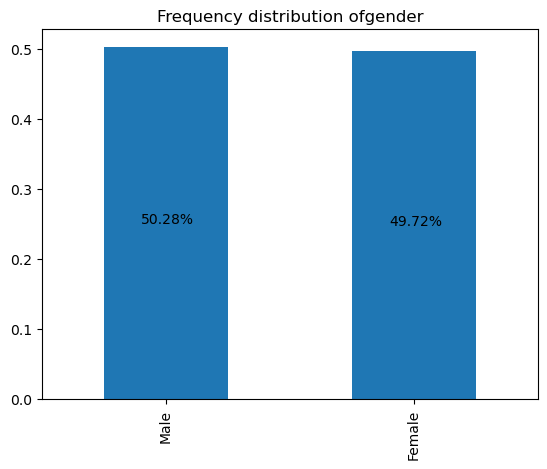

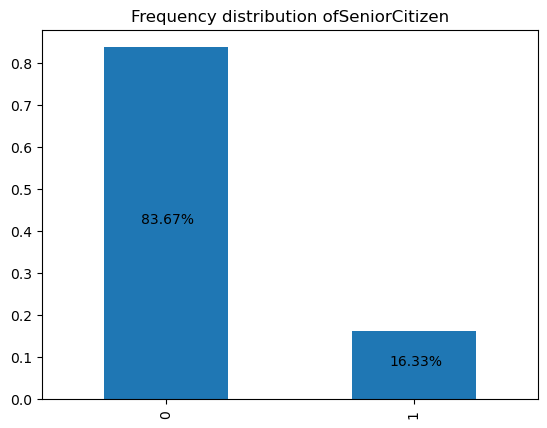

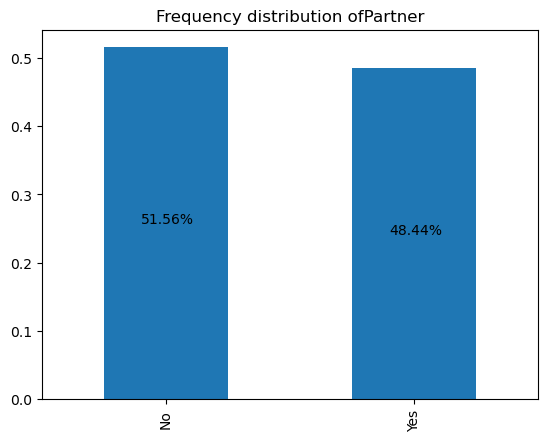

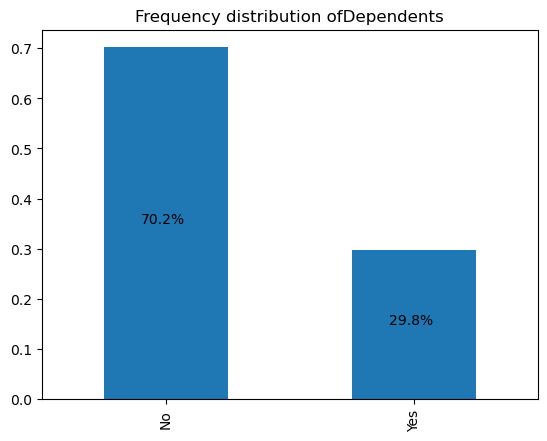

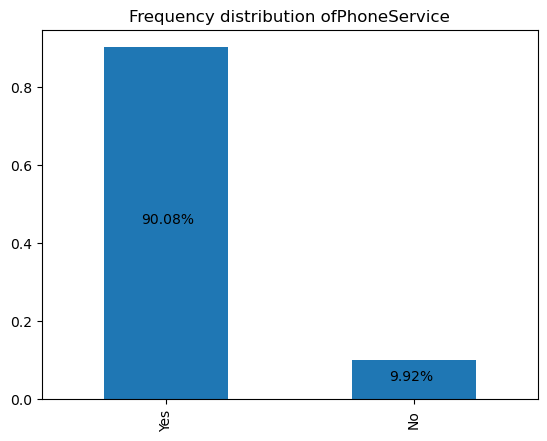

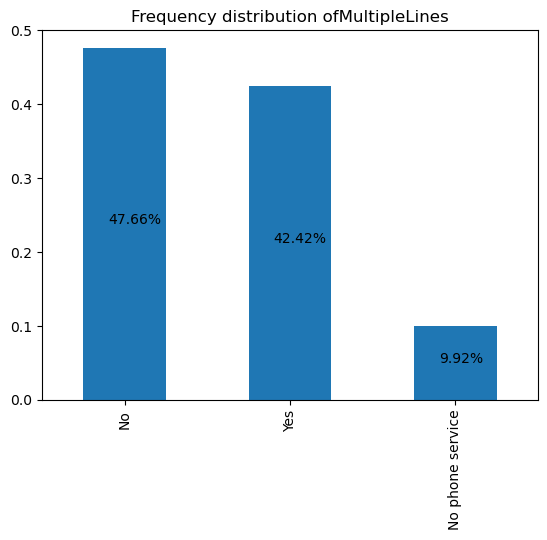

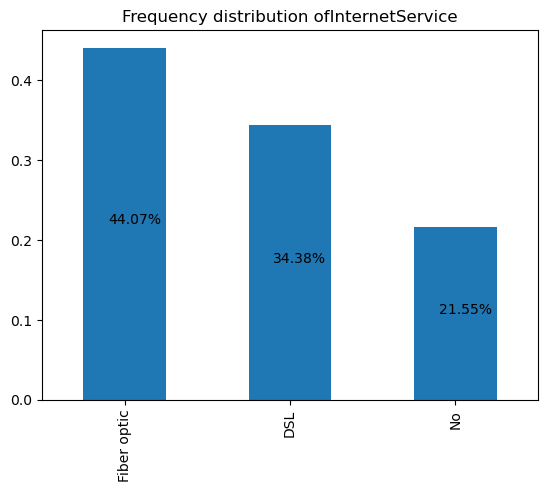

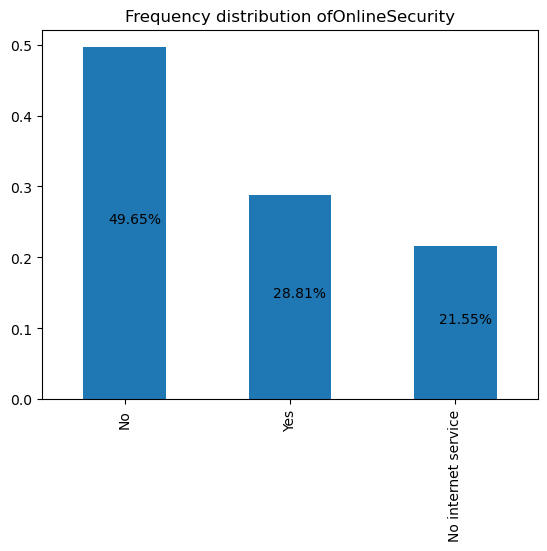

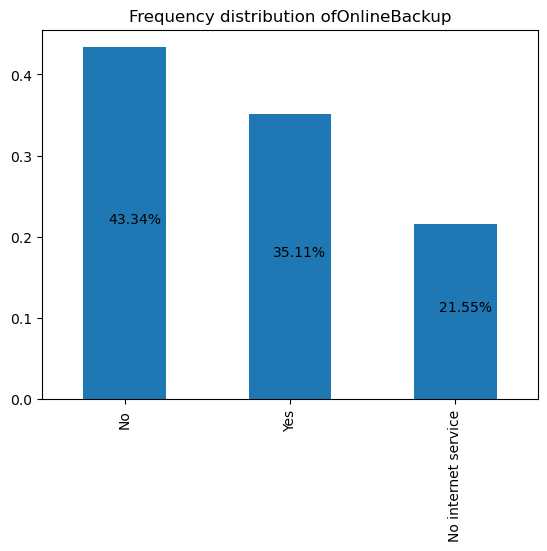

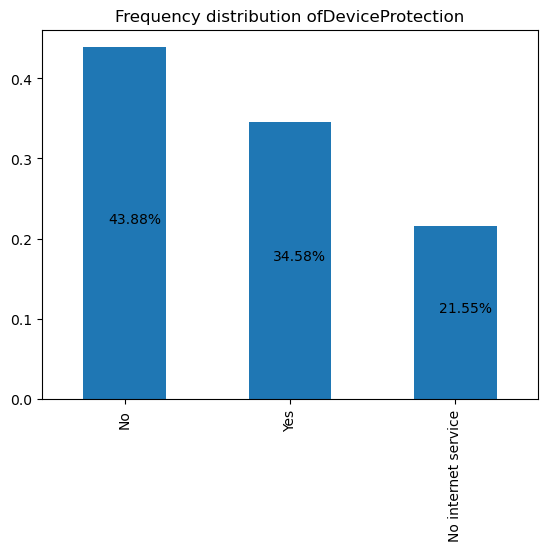

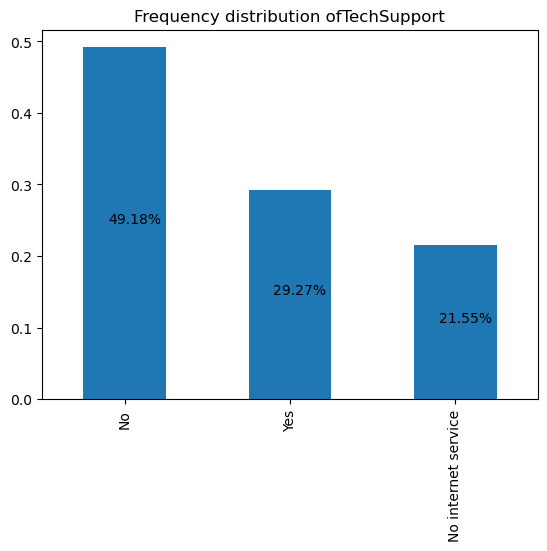

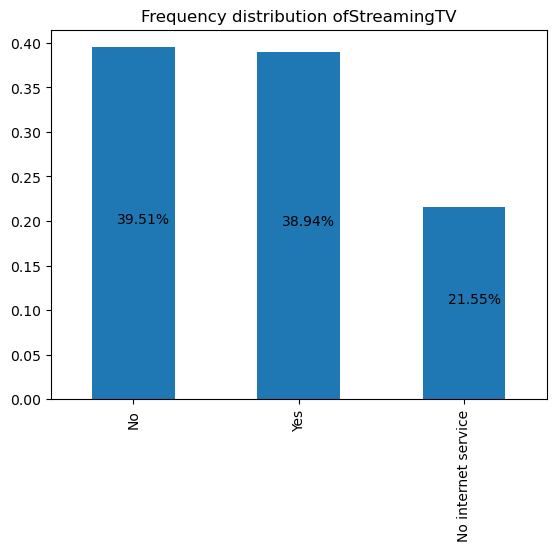

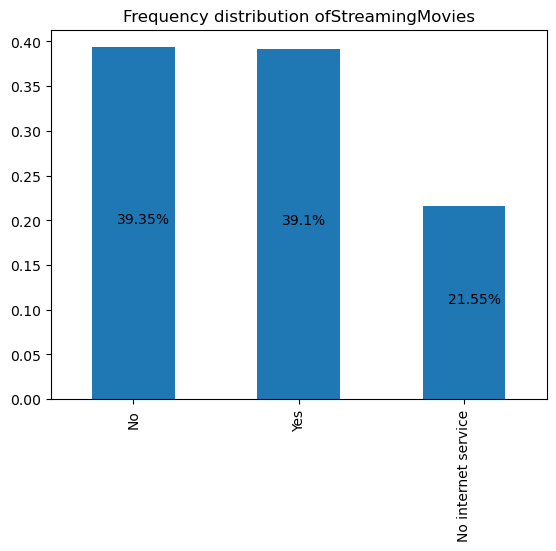

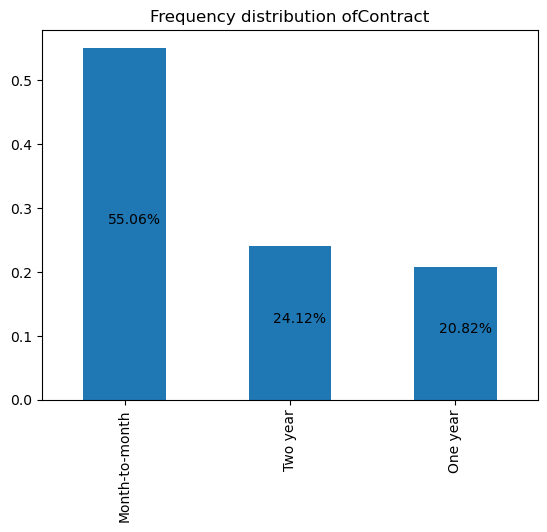

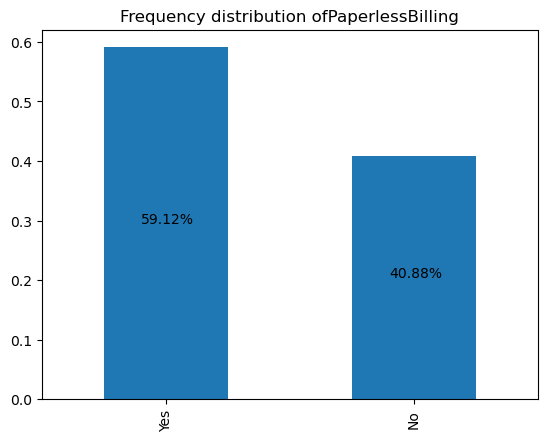

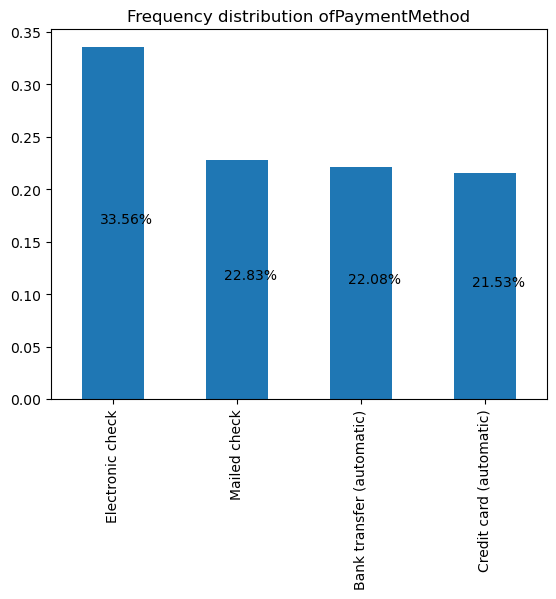

In [65]:
for var in categorical_features:
    plt.title(f"Frequency distribution of{var}")
    frequency = x_train[var].value_counts(normalize=True)
    frequency.plot(kind='bar')
    plt.xlabel(None)
    for n, label in enumerate(frequency.index):
        plt.text(x=n-0.1, y=frequency[label]/2, s=f"{np.round(frequency [label]*100,2)}%")
    plt.show();
    print('\n')

Numeric Feature Distribution

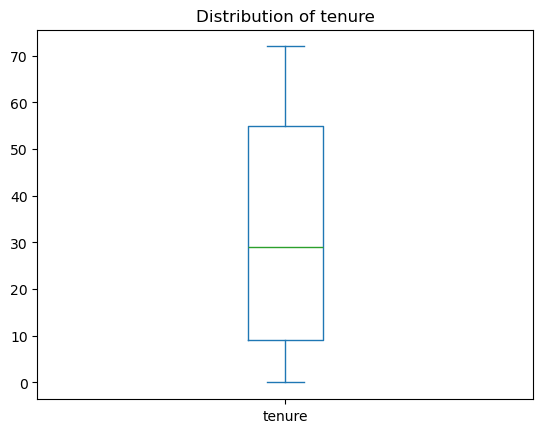

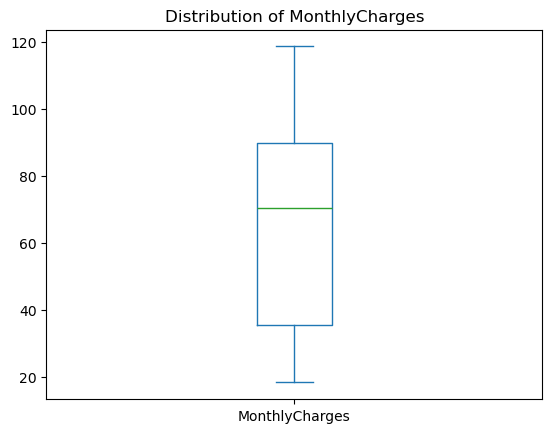

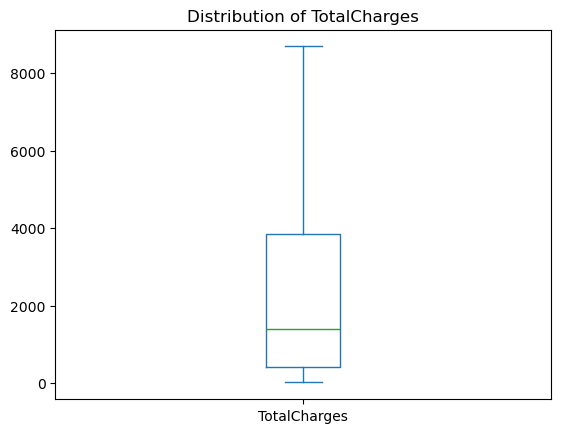

In [66]:
for var in numeric_features:
    plt.title(f"Distribution of {var}")
    x_train[var].plot(kind='box')
    plt.xlabel(None)
    plt.show();
    print('\n')

Target Distribution 

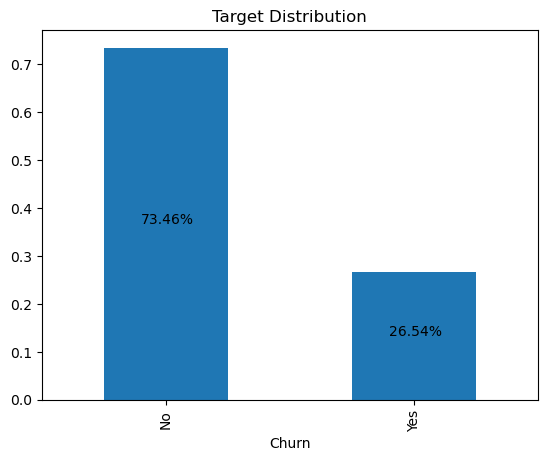

In [67]:
target_distribution  = y_train.value_counts(normalize=True)
target_distribution.plot(kind='bar');
plt.title('Target Distribution')
for n, label in enumerate(target_distribution.index):
       plt.text(x=n-0.1, y=target_distribution[label]/2, s=f"{np. round(target_distribution[label] * 100, 2)}%")    
plt.show();    

Churn distribution by categorical features 

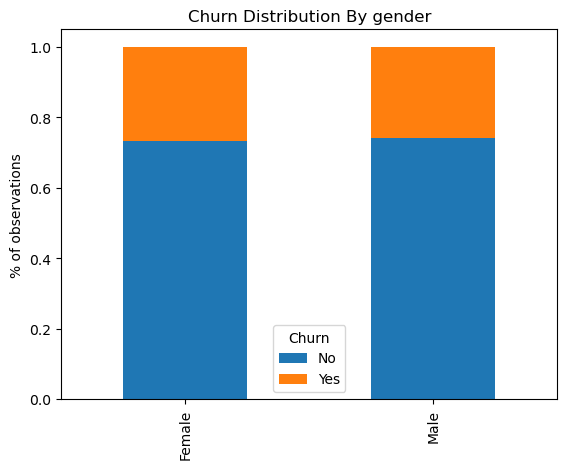

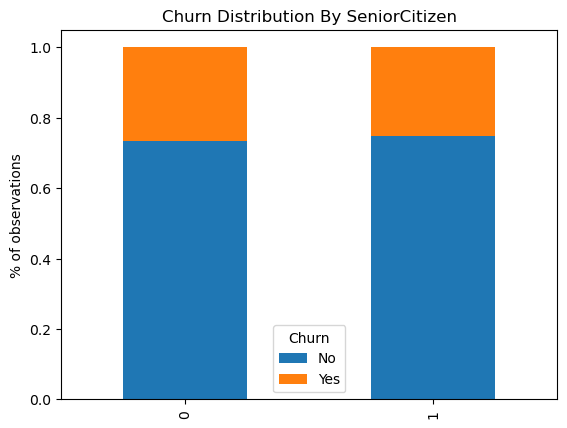

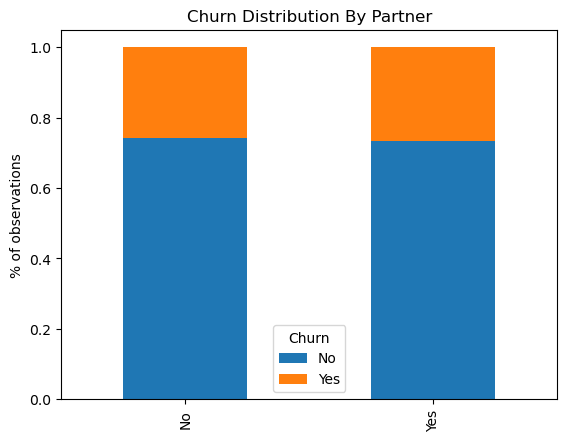

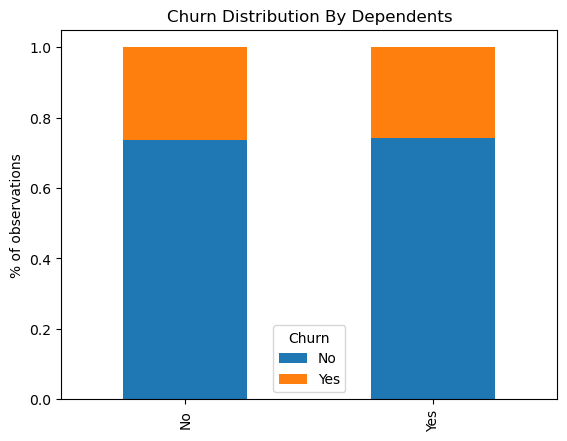

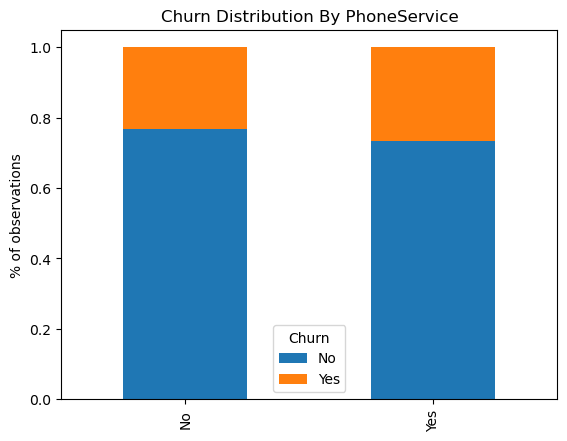

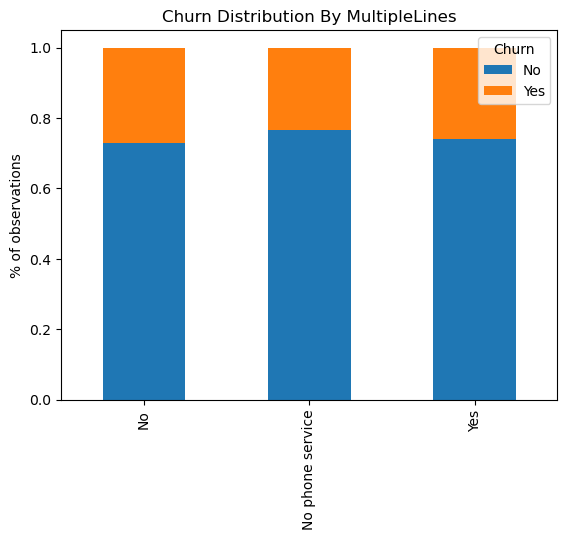

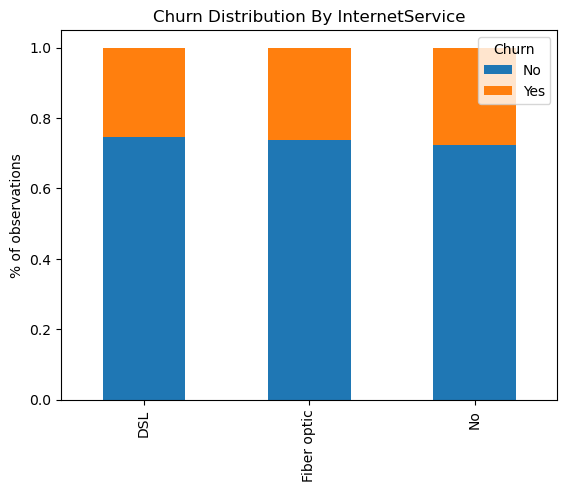

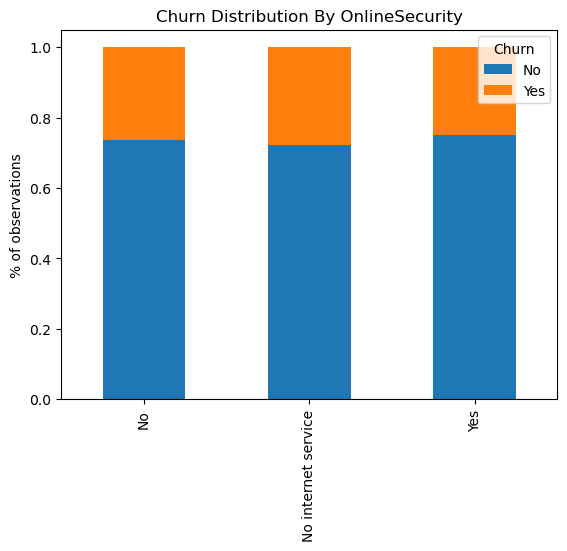

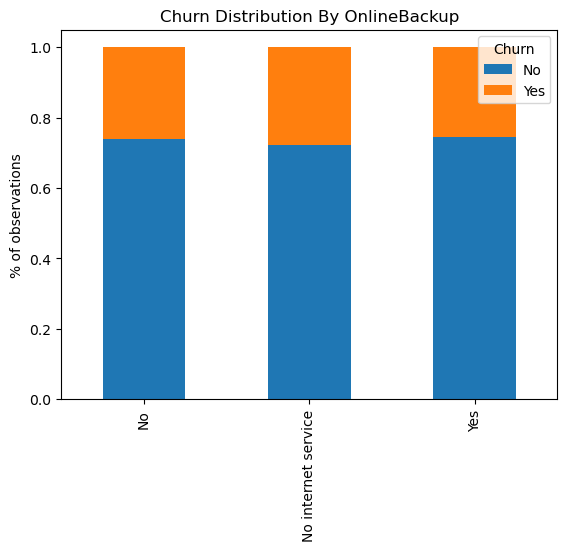

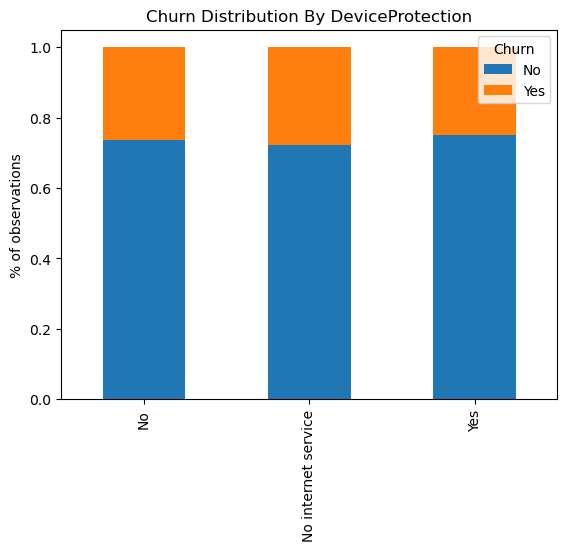

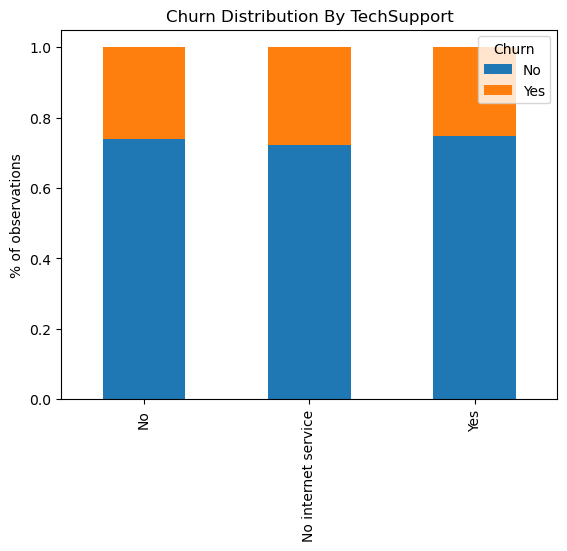

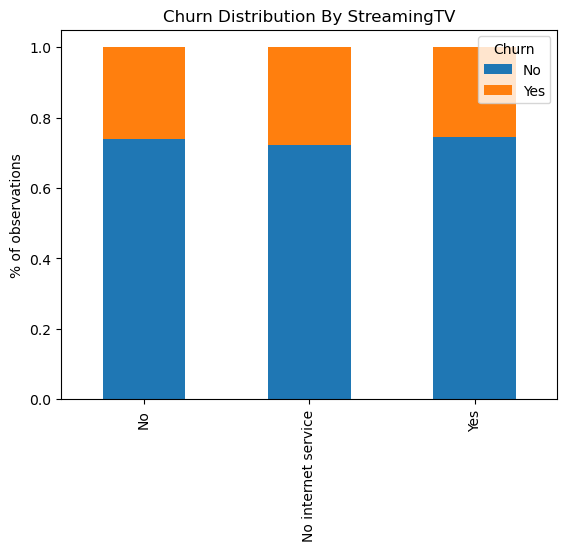

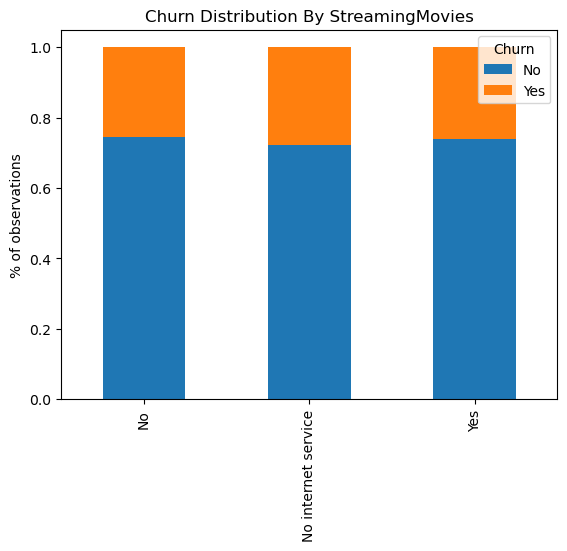

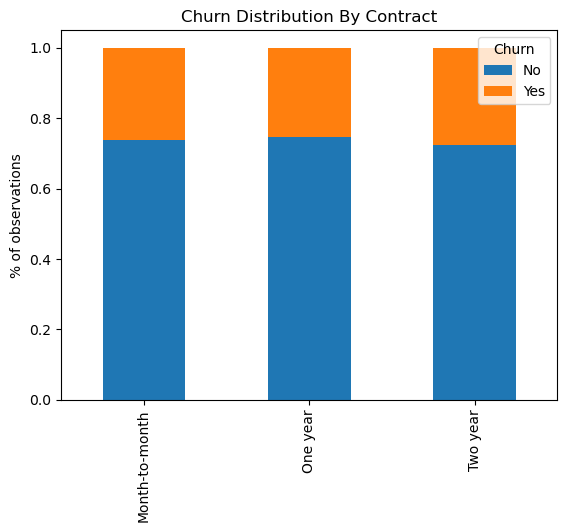

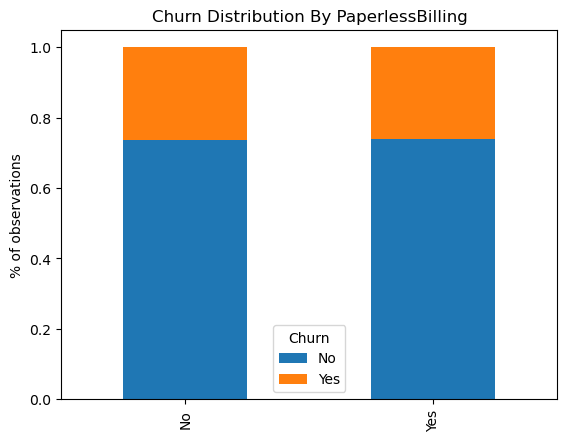

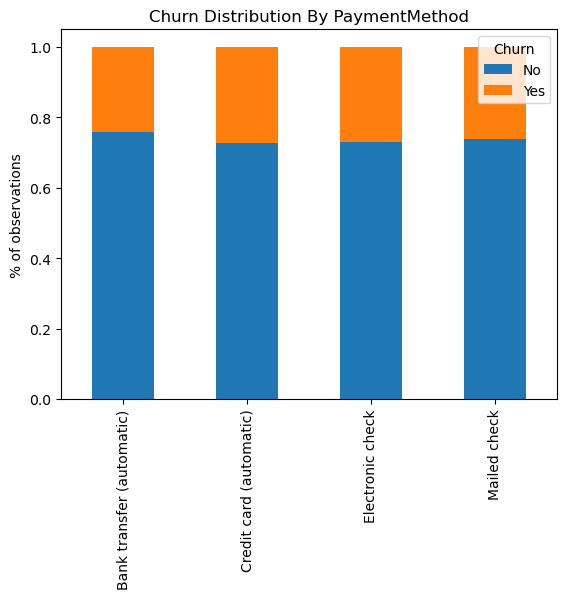

In [68]:
for n,i in enumerate(categorical_features):
    ct = pd.crosstab(columns=x_train[i],index=y_train,normalize="columns")
    ct.T.plot(kind="bar",stacked=True)
    plt.ylabel("% of observations")
    plt.title(f"Churn Distribution By {i}")
    plt.xlabel(None)
    plt.show()
    print("\n")

Churn distribution by numeric featur

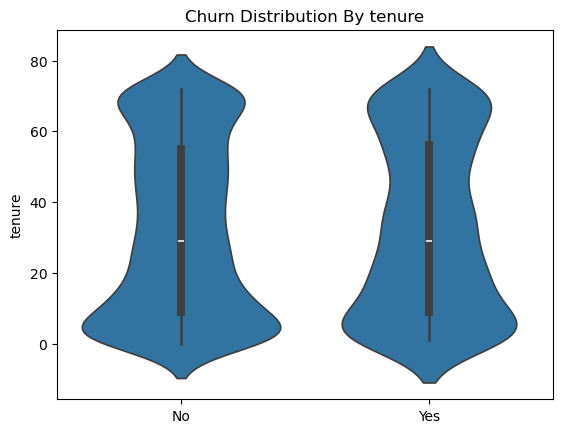

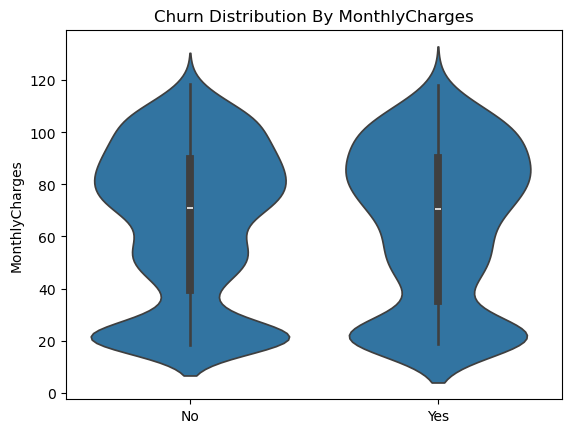

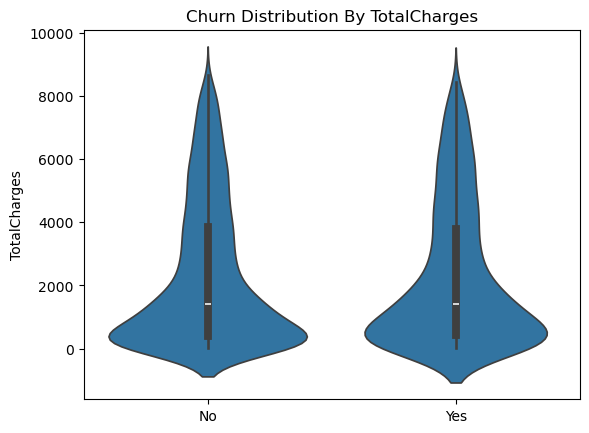

In [69]:
for n,i in enumerate(numeric_features):
    distribution = x_train[[i]].copy()
    distribution['churn'] = y_train
    sns.violinplot(data=distribution, y=i, x='churn')
    plt.title(f"Churn Distribution By {i}")
    plt.xlabel(None)
    plt.show()
    print("\n")

Data Preprocessing 

Categorical Missing value imputation with mode

In [70]:
categorical_mode_imputer_ct = ColumnTransformer(transformers=[['categorical_mode_imputer',
                                                                       SimpleImputer(strategy='most_frequent'),
                                                                       categorical_features]],
                                                        remainder='passthrough',
                                                        verbose_feature_names_out=False)
categorical_mode_imputer_ct.set_output(transform='pandas')
x_train = categorical_mode_imputer_ct.fit_transform(x_train)

In [71]:
x_train.dtypes # make sure numerical features are not converted to str

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
tenure                int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object

One hot Encoding categorical features

In [72]:
one_hot_encoder_ct = ColumnTransformer(transformers=[['oneone_hot_encoder',
                                                       OneHotEncoder(drop='first', sparse_output=False),
                                                       categorical_features]],
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)
one_hot_encoder_ct.set_output(transform='pandas')
x_train = one_hot_encoder_ct.fit_transform(x_train)

In [73]:
x_train.dtypes # make sure no feature is string

gender_Male                              float64
SeniorCitizen_1                          float64
Partner_Yes                              float64
Dependents_Yes                           float64
PhoneService_Yes                         float64
MultipleLines_No phone service           float64
MultipleLines_Yes                        float64
InternetService_Fiber optic              float64
InternetService_No                       float64
OnlineSecurity_No internet service       float64
OnlineSecurity_Yes                       float64
OnlineBackup_No internet service         float64
OnlineBackup_Yes                         float64
DeviceProtection_No internet service     float64
DeviceProtection_Yes                     float64
TechSupport_No internet service          float64
TechSupport_Yes                          float64
StreamingTV_No internet service          float64
StreamingTV_Yes                          float64
StreamingMovies_No internet service      float64
StreamingMovies_Yes 

In [74]:
x_train.isna().mean()

gender_Male                              0.00000
SeniorCitizen_1                          0.00000
Partner_Yes                              0.00000
Dependents_Yes                           0.00000
PhoneService_Yes                         0.00000
MultipleLines_No phone service           0.00000
MultipleLines_Yes                        0.00000
InternetService_Fiber optic              0.00000
InternetService_No                       0.00000
OnlineSecurity_No internet service       0.00000
OnlineSecurity_Yes                       0.00000
OnlineBackup_No internet service         0.00000
OnlineBackup_Yes                         0.00000
DeviceProtection_No internet service     0.00000
DeviceProtection_Yes                     0.00000
TechSupport_No internet service          0.00000
TechSupport_Yes                          0.00000
StreamingTV_No internet service          0.00000
StreamingTV_Yes                          0.00000
StreamingMovies_No internet service      0.00000
StreamingMovies_Yes 

Numeric missing value imputation with median

In [75]:
numeric_median_imputer_ct = ColumnTransformer(transformers=[['numeric_median_imputer',
                                                               SimpleImputer(strategy='median'),
                                                               numeric_features]],
                                                remainder='passthrough',
                                                verbose_feature_names_out=False)
numeric_median_imputer_ct.set_output(transform='pandas')
x_train = numeric_median_imputer_ct.fit_transform(x_train)

In [76]:
x_train.dtypes

tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                              float64
SeniorCitizen_1                          float64
Partner_Yes                              float64
Dependents_Yes                           float64
PhoneService_Yes                         float64
MultipleLines_No phone service           float64
MultipleLines_Yes                        float64
InternetService_Fiber optic              float64
InternetService_No                       float64
OnlineSecurity_No internet service       float64
OnlineSecurity_Yes                       float64
OnlineBackup_No internet service         float64
OnlineBackup_Yes                         float64
DeviceProtection_No internet service     float64
DeviceProtection_Yes                     float64
TechSupport_No internet service          float64
TechSupport_Yes                          float64
StreamingTV_No inter

In [77]:
x_train.isna().mean()

tenure                                   0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
gender_Male                              0.0
SeniorCitizen_1                          0.0
Partner_Yes                              0.0
Dependents_Yes                           0.0
PhoneService_Yes                         0.0
MultipleLines_No phone service           0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No internet service       0.0
OnlineSecurity_Yes                       0.0
OnlineBackup_No internet service         0.0
OnlineBackup_Yes                         0.0
DeviceProtection_No internet service     0.0
DeviceProtection_Yes                     0.0
TechSupport_No internet service          0.0
TechSupport_Yes                          0.0
StreamingTV_No internet service          0.0
StreamingTV_Yes                          0.0
StreamingM

All missing values are imputed

Minmax scaler

In [78]:
minmax_scaler = MinMaxScaler()
x_train = pd.DataFrame(minmax_scaler.fit_transform(x_train), columns=minmax_scaler.get_feature_names_out())

In [79]:
x_train

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.486111,0.306926,0.194185,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.208333,0.565022,0.130707,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.180556,0.220727,0.065948,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.361111,0.549078,0.217731,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.013889,0.260588,0.002966,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0.986111,0.905331,0.887248,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5630,0.027778,0.275536,0.007097,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5631,0.347222,0.841056,0.304796,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5632,0.333333,0.019930,0.053537,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Label Encoder

In [80]:
y_train

3738     No
3151     No
4860     No
3867     No
3810     No
       ... 
6303     No
6227    Yes
4673    Yes
2710     No
5639     No
Name: Churn, Length: 5634, dtype: object

In [81]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [82]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

Model Training functions

Data Cleaning Function

In [83]:
def clean_data(x):
    try:
        x = x.copy()
        if x['SeniorCitizen'].dtype != 'O':
            x['SeniorCitizen'] = x['SeniorCitizen'].astype('str')
            print('Converted SeniorCitizen data type to string')
        else:
            print('SeniorCitizen data type is alread string')

        if x['TotalCharges'].dtype == 'O':
            x['TotalCharges'] = x['TotalCharges'].replace(' ',None).astype('float')
            print('Converted TotalCharges data type to float')
        else:
            print('TotalCharges data type is not string. Hence not converting it')

        if 'customerID' in x.columns:
            x.drop(columns=['customerID'], inplace=True)
            print('Dropped customerID column')
        else:
             print('customerID column not found.Hence, not deleting it')

        print("Data Cleaning Successful")
        return x
    except Exception as e:
          print("Data Cleaning Failed")
          return None                     

Train Data Preprocessing Function

In [84]:
def preprocess_train_data(x_train, y_train, numaric_features, categorical_features):
    try: 
        x_train = x_train.copy()
        y_train = y_train.copy()
        # Categorical missing value imputation
        categorical_mode_imputer_ct = ColumnTransformer(transformers=[['categorical_mode_imputer',
                                                                       SimpleImputer(strategy='most_frequent'),
                                                                       categorical_features]],
                                                        remainder='passthrough',
                                                        verbose_feature_names_out=False)
        categorical_mode_imputer_ct.set_output(transform='pandas')
        x_train = categorical_mode_imputer_ct.fit_transform(x_train)

        # Onehot encoder
        one_hot_encoder_ct = ColumnTransformer(transformers=[['one_hot_encoder',
                                                              OneHotEncoder(drop='first', sparse_output=False),
                                                              categorical_features]],
                                               remainder='passthrough',
                                               verbose_feature_names_out=False)
        one_hot_encoder_ct.set_output(transform='pandas')
        x_train = one_hot_encoder_ct.fit_transform(x_train)

        # numeric missing value imputation
        numeric_median_imputer_ct = ColumnTransformer(transformers=[['numeric_median_imputer',
                                                                     SimpleImputer(strategy='median'),
                                                                     numeric_features]],
                                                      remainder='passthrough',
                                                      verbose_feature_names_out=False)
        numeric_median_imputer_ct.set_output(transform='pandas')
        x_train = numeric_median_imputer_ct.fit_transform(x_train)

        # minmax scsler
        minmax_scaler = MinMaxScaler()
        x_train = pd.DataFrame(minmax_scaler.fit_transform(x_train), columns=minmax_scaler.get_feature_names_out())

        # label encoder
        label_encoder = LabelEncoder()
        y_train = label_encoder.fit_transform(y_train)

        print('Successfully Preprocessed Data')
        # save preprocessors
        with open("preprocessor.bin", 'wb') as f:
            cloudpickle.dump((categorical_mode_imputer_ct,
                              one_hot_encoder_ct,
                              numeric_median_imputer_ct,
                              minmax_scaler,
                              label_encoder), f)
        print('Saved preprocessors to preprocessor.bin')
        return x_train, y_train
    except Exception as e:
        print(f' Failed To Preprocess Data: {e}')
        return None, None

Test Data Preprocessing Function

In [85]:
def preprocess_inference_data(x_test, y_test, preprocessor):
    try:
        x_test = x_test.copy()
        if y_test is not None:
            y_test = y_test.copy()

        (categorical_mode_imputer_ct,
         one_hot_encoder_ct,
         numeric_median_imputer_ct,
         minmax_scaler, label_encoder) = preprocessor

         # Categorical missing value imputation
        categorical_mode_imputer_ct.set_output(transform='pandas')
        x_test = categorical_mode_imputer_ct.transform(x_test)

        # Onehot encoder
        one_hot_encoder_ct.set_output(transform='pandas')
        x_test = one_hot_encoder_ct.transform(x_test)

        # numeric missing value imputation
        numeric_median_imputer_ct.set_output(transform='pandas')
        x_train = numeric_median_imputer_ct.fit_transform(x_train)

        # minmax scaler
        x_train = pd.DataFrame(minmax_scaler.fit_transform(x_train), columns=minmax_scaler.get_feature_names_out())

        # label encoder
        if y_test is not None:
            y_test = label_encoder.transform(y_test)

        print('Successfully Preprocessed Data')
        return x_test, y_test, label_encoder
    except Exception as e:
        print(f' Failed To Preprocess Data: {e}')
        return None, None, None    
 

Find class weight to handle imblanced classes

In [86]:
def find_class_weights(y):
    classes_ = np.sort(pd.Series(y).unique())
    class_weight_param = {class_: weight for class_, weight in 
                          zip(classes_, class_weight.compute_class_weight(class_weight='balanced',
                                                                          classes=classes_, y=y))}
    return class_weight_param

Find Best Model Function

In [87]:
def find_best_model(x_train, y_train, verdose=True):
    models = ['logistic', 'svc', 'decision_tree', 'random_forest']
    class_weight = find_class_weights(y_train)

    scores = dict()
    params = dict()
    fitted_models = dict()

    for model_name in models:
        print(f"Fitting {model_name}")
        if model_name == 'logistic':
            pram_grid = {'C': [0.01, 0.1, 1, 10, 100],
                 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
            model = LogisticRegression(max_iter=10000, class_weight=class_weight)

        elif model_name =='svc':
            param_grid ={'C': [0.01, 0.1, 1, 10],
                 'Kernel': ['poly', 'rbf'],
                 'gamma': ['scale', 'auto'],
                 'degree': [3, 5, 7]}
            model = SVC(class_weight=class_weight)

        elif model_name == 'decision_tree':
            param_grid = {'criterion': ["gini", "entropy", "log_loss"],
                 'max_depth': [3, 5, 7 ,8, 9]
                }
            model = DecisionTreeClassifier(random_state=42, class_weight=class_weight)

        elif model_name == 'random_forest':  
            param_grid = {'criterion': ["gini", "entropy", "log_loss"],
                'max_depth': [3, 5, 7 ,8, 9],
                'n_estimators':[100, 150, 200] 
              }  
        model = RandomForestClassifier(random_state=42, class_weight=class_weight)

        gscv = GridSearchCV(estimator=model,
                       param_grid=param_grid,
                         cv=5,
                         n_jobs=-1,
                         scoring="roc_auc",
                         refit=True, verbose=verbose)
    gscv.fit(x_train, y_train)
    scores[model_name] = gscv.best_score_
    params[model_name] = gscv.best_params_
    fitted_models[model_name] = gscv
    print(f"Successfully Fitted {model_name}")

    best_model_name = sorted(scores.items(), key=lambda x: x[1], reverse=True)[0][0]
    best_fitted_model = fitted_models[best_model_name]
    best_score = scores[best_model_name]
    best_params = params[best_model_name]
    return best_model_name, best_fitted_model, best_score, best_params                          

Model Evaluation Function

In [88]:
def evaluate_model(model, x, y_train):
    y_pred = model.predict(x)
    y_pred_proba = model.predict_proba(x)[:,1]
    print(f"Classification Report:\n{classification_report(y_true=y_true, y_pred=y_pred)}")
    print("\nCONFUSION MATRIX")
    sns.heatmap(confusion_matrix(y_true=y_true, y_pred=y_pred), annot=True, cbar=False, fmt='.2f')
    plt.show();
    print(f"\nArea Under ROC Curve: {roc_auc_score(y_true=y_true, y_score=y_pred_proba)}")
    print(f"\nAccuracy: {accuracy_score(y_true=y_true, y_score=y_pred_proba)}")

MODEL TRAINING

Read data

In [89]:
data = read_data("Telco_Customer_Churn.csv")

Successfully Read The Data


In [90]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Split Data

In [91]:
data_splits = split_data(df=data, test_size=0.2, target="Churn")
if data_splits is not None:
    x_train, x_test, y_train, y_test = data_splits

Successfully Split The Data


In [92]:
print(f"x_train.shape = {x_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"x_test.shape = {x_test.shape}")
print(f"y_test.shape = {y_test.shape}")

x_train.shape = (5634, 20)
y_train.shape = (5634,)
x_test.shape = (1409, 20)
y_test.shape = (1409,)


Clean train data

In [93]:
x_train = clean_data(x_train)

Converted SeniorCitizen data type to string
Converted TotalCharges data type to float
Dropped customerID column
Data Cleaning Successful


Clean test data

In [94]:
x_test = clean_data(x_test)

Converted SeniorCitizen data type to string
Converted TotalCharges data type to float
Dropped customerID column
Data Cleaning Successful


In [95]:
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x_train.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print(f"numeric_features: {numeric_features}\n")
print(f"categorical_features: {categorical_features}")

numeric_features: ['tenure', 'MonthlyCharges', 'TotalCharges']

categorical_features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Preprocess Train Data

In [96]:
x_train_preprocessed, y_train = preprocess_train_data(x_train=x_train,
                                                      y_train=y_train,
                                                      numaric_features=numeric_features,
                                                      categorical_features=categorical_features
                                                     )
                                                     

Successfully Preprocessed Data
Saved preprocessors to preprocessor.bin


Load saved Preprocessors

In [122]:
def load_preprocessor():
    with open("preprocessor.bin", 'rb') as f:
        preprocessor = cloudpickle.load(f)
    print("Successfully loaded preprocessor")
    return preprocessor   

In [123]:
preprocessor = load_preprocessor() 

Successfully loaded preprocessor


In [124]:
import pandas as pd
import numpy as np
# Ensure cloudpickle is imported if you loaded the preprocessor using it

def preprocess_inference_data(x_test: pd.DataFrame, y_test: pd.Series, preprocessor):
    """
    Applies a fitted preprocessor to the test/inference data.

    Args:
        x_test (pd.DataFrame): The test features (unprocessed).
        y_test (pd.Series): The test target variable.
        preprocessor: The fitted scikit-learn ColumnTransformer or Pipeline.

    Returns:
        tuple: (x_test_preprocessed, y_test, feature_names_out)
    """

    try:
        # 1. Apply the transformation to the features (X)
        # This step is where errors related to missing/new categories often occur
        x_test_array = preprocessor.transform(x_test)
        
        # 2. Get the feature names from the fitted preprocessor
        # This method is common for scikit-learn's transformers in newer versions
        feature_names_out = preprocessor.get_feature_names_out() 
        
        # 3. Convert the NumPy array output back to a Pandas DataFrame
        # This conversion is necessary if you plan to use DataFrame methods like .columns
        x_test_preprocessed = pd.DataFrame(
            x_test_array, 
            columns=feature_names_out,
            index=x_test.index # Preserve the original index
        )
        
        # 4. Successful exit: Return the expected three variables
        return x_test_preprocessed, y_test, feature_names_out
        
    except Exception as e:
        # 5. Error handling: Print the actual error that caused the crash
        print("--- 🔴 ERROR: Preprocessing Test Data Failed ---")
        print(f"Error Type: {type(e).__name__}")
        print(f"Details: {e}")
        
        # 6. Failed exit: Return a full tuple of Nones 
        # This prevents the program from crashing, but indicates an issue
        return None, y_test, None 
        # Note: If you want to force the program to stop and debug immediately, 
        # use 'raise' instead of returning None.

Preprocess Test Data

In [131]:
def find_best_model(x_train, y_train, verbose=True):
    # 1. Initialize result variables to safe defaults
    best_score = -float('inf')
    best_fitted_model = None
    best_model_name = None
    best_params = None
    scores = {} # Dictionary to hold scores for all models

    # NOTE: You may need to calculate class_weight if your dataset is imbalanced.
    # class_weight = 'balanced' 
    # OR: class_weight = {0: 1, 1: sum(y_train == 0) / sum(y_train == 1)} # Example calculation
    class_weight = 'balanced' # Assuming balanced for this example

    # 2. Define the models and their parameter grids in a single structure
    # This ensures all necessary variables are defined and used systematically.
    models_to_test = [
        {
            'name': 'RandomForest',
            'model_estimator': RandomForestClassifier(random_state=42, class_weight=class_weight),
            'param_grid': {
                'criterion': ["gini", "entropy"],
                'max_depth': [3, 5, 7, 9],
                'n_estimators': [100, 150, 200]
            }
        },
        # Example of adding another model (if you intend to test more than one)
        {
            'name': 'LogisticRegression',
            'model_estimator': LogisticRegression(random_state=42, solver='liblinear', class_weight=class_weight),
            'param_grid': {
                'C': [0.1, 1.0, 10.0],
                'penalty': ['l1', 'l2']
            }
        }
    ] 

    # 3. Loop through all models and run the search
    for test in models_to_test:
        model_name = test['name']
        model = test['model_estimator']
        param_grid = test['param_grid']

        print(f"\n--- Starting Grid Search for {model_name} ---")

        # GridSearchCV uses the defined variables (which are guaranteed to exist now)
        gscv = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5, # 5-fold cross-validation
                           n_jobs=-1, # Use all available CPU cores
                           scoring="roc_auc", # Your specified scoring metric
                           refit=True, verbose=verbose)

        try:
            # 4. Fit the model and search the parameter space
            gscv.fit(x_train, y_train)

            # 5. Store and compare results
            scores[model_name] = gscv.best_score_
            
            if gscv.best_score_ > best_score:
                best_score = gscv.best_score_
                best_fitted_model = gscv.best_estimator_
                best_model_name = model_name
                best_params = gscv.best_params_
                
            print(f"--- {model_name} Complete. Best ROC AUC: {gscv.best_score_:.4f} ---")

        except Exception as e:
            print(f"--- 🔴 ERROR: {model_name} Training Failed ---")
            print(f"Details: {e}")
            # Continue to the next model if one fails
            continue 

    # 6. Return the best results found from the entire loop
    return best_model_name, best_fitted_model, best_score, best_params



Find Best Model

In [132]:
best_model_name, best_fitted_model, best_score, best_params = find_best_model(x_train=x_train_preprocessed, y_train=y_train)


--- Starting Grid Search for RandomForest ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits
--- RandomForest Complete. Best ROC AUC: 0.8460 ---

--- Starting Grid Search for LogisticRegression ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
--- LogisticRegression Complete. Best ROC AUC: 0.8455 ---


In [133]:
best_model_name

'RandomForest'

In [134]:
best_score # au roc

np.float64(0.8460097882973171)

In [137]:
best_params

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 200}

In [138]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

def evaluate_model(model, x_test, y_test):
    """
    Evaluates a fitted classification model on the test set and prints key metrics.
    
    Args:
        model: The best fitted model estimator (e.g., from your find_best_model function).
        x_test: The preprocessed test features (Pandas DataFrame or NumPy array).
        y_test: The true target values for the test set (Pandas Series or NumPy array).
    """
    
    print("\n" + "="*50)
    print(f"EVALUATING MODEL: {model.__class__.__name__}")
    print("="*50)

    try:
        # 1. Use predict() for standard classification metrics
        y_pred = model.predict(x_test)
        
        # 2. Use predict_proba() for ROC AUC if the model supports it
        y_pred_proba = None
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(x_test)[:, 1]
        
        # 3. Calculate and Print Metrics
        
        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        
        # ROC AUC Score
        if y_pred_proba is not None:
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            print(f"ROC AUC Score: {roc_auc:.4f}")
        else:
            roc_auc = "N/A (Model lacks predict_proba)"
            print("ROC AUC Score: N/A (Model lacks predict_proba)")

        # Classification Report (Precision, Recall, F1-Score)
        print("\n--- CLASSIFICATION REPORT ---")
        # Ensure y_test is correctly passed as y_true
        print(classification_report(y_true=y_test, y_pred=y_pred, digits=4))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        print("\n--- CONFUSION MATRIX ---")
        print(cm)
        

        # 4. Return Key Metrics (Optional)
        return {'accuracy': accuracy, 'roc_auc': roc_auc, 'cm': cm, 'report': classification_report}
        
    except Exception as e:
        print("\n--- 🔴 ERROR: Model Evaluation Failed ---")
        print(f"Error Type: {type(e).__name__}")
        print(f"Details: {e}")
        print("\nPossible issues: Column misalignment, data shape mismatch, or x_test is invalid.")
        return None

Evaluate Best Model on Test Set

In [154]:
evaluate_model(best_fitted_model, x_test_preprocessed, y_test)


EVALUATING MODEL: RandomForestClassifier

--- 🔴 ERROR: Model Evaluation Failed ---
Error Type: ValueError
Details: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Possible issues: Column misalignment, data shape mismatch, or x_test is invalid.


C:\Users\Vedanthi BhargavI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Plot Coefficients / Feature Importance

In [155]:
def plot_feature_importance(importance, features):
    fig = plt.figure(figsize=(10,12))
    feature_importance = pd.DataFrame({'feature': features,
                                       'score': importance})
    feature_importance.sort_values(by='score', ascending=False, inplace=True)
    sns.barplot(data=feature_importance, y='feature', x='score')
    plt.title('Feature Importance')
    plt.show()                               

In [156]:
features = x_train_preprocessed.columns

# 1. Initialize 'importance' to a default value (like None)
importance = None 

if best_model_name in ['decision_tree', 'random_forest']:
    # NOTE: You also had a potential typo here: it should be .feature_importances_
    try:
        # Assuming best_fitted_model is a GridSearchCV object, access the best estimator
        importance = best_fitted_model.best_estimator_.feature_importances_
    except AttributeError:
        # Fallback if best_fitted_model is already the final estimator
        importance = best_fitted_model.feature_importances_ 

elif best_model_name == 'logistic':
    try:
        # Assuming best_fitted_model is a GridSearchCV object
        # Use absolute value of the coefficient for importance magnitude
        importance = np.abs(best_fitted_model.best_estimator_.coef_[0])
    except AttributeError:
        # Fallback if best_fitted_model is already the final estimator
        importance = np.abs(best_fitted_model.coef_[0])

else:
    # 2. Handle the model name not matching
    print(f"WARNING: Cannot plot feature importance for model '{best_model_name}'. Importance not calculated.")
    # importance remains None

# 3. Only call the plotting function if importance was successfully calculated
if importance is not None:
    plot_feature_importance(importances=importance, features=features)

Save the best model

In [157]:
def save_model(model, filename):
    with open(filename, 'wb') as f:
        cloudpickle.dump(model, f)
    print(f"Successfully saved the model to {filename}")    

In [158]:
save_model(best_fitted_model, 'model.bin')

Successfully saved the model to model.bin


INFERENCE CODE

Load saved Preprocessors

In [176]:
def load_preprocessor():
    with open("preprocessor.bin", 'rb') as f:
        preprocessor = cloudpickle.load(f)
    print("Successfully loaded preprocessor")
    return preprocessor        

In [177]:
# 🚨 PROBLEM LINE (Assuming load_preprocessor returns a tuple like (transformer, metadata))
preprocessor = load_preprocessor()

Successfully loaded preprocessor


In [179]:
preprocessor = load_preprocessor()
print(f"Type of preprocessor: {type(preprocessor)}")

Successfully loaded preprocessor
Type of preprocessor: <class 'tuple'>


Load saved model

In [180]:
def load_model():
    with open("model.bin", 'rb') as f:
        model = cloudpickle.load(f)
    print("Loaded model successfully")
    return model

In [181]:
model = load_model()

Loaded model successfully


inference function

In [185]:
def inference(x, model, preprocessor):
    try: 
        x = clean_data(x)
        if x is None:
            raise Exception("Failed to clean the data")
        x_preprocessed, _, label_encoder = preprocess_inference_data(x, None, preprocessor)
        if x_preprocessed is None:
            raise Exception("Failed to preprocess the data")
        y_pred = model.predict(x_preprocessed)
        return label_encoder.inverse_transform(y_pred)[0]
    except Exception as e:
        return f"Inference failed: {e}"

In [186]:
inference(x_test.loc[[0], :], model, preprocessor) 

SeniorCitizen data type is alread string
TotalCharges data type is not string. Hence not converting it
customerID column not found.Hence, not deleting it
Data Cleaning Successful
--- 🔴 ERROR: Preprocessing Test Data Failed ---
Error Type: AttributeError
Details: 'tuple' object has no attribute 'transform'


'Inference failed: Failed to preprocess the data'

BUILD STREAMLIT APP

In [187]:
#%%writefile streamlit_app.py

import streamlit as st
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer 
from compose import ColumnTransformer
import cloudpickle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.esemble import RandomFrosetClassifier

@st.cache_resource
def load_preprocessor():
    with open("preprocessor.bin", 'rb') as f:
        preprocessor = cloudpickle.load(f)
    print("Successfully loaded preprocessor")
    return preprocessor

@st.cache_resource
def load_model():
    with open("model.bin", 'rb') as f:
        model = cloudpickle.load(f)
    print("Loaded model Successfully")
    return model 


preprocessor = load_preprocessor()
model = load_model()



def clearn_data(x):
    try:
        x = x.copy()
        if x['SeniorCitizen'].dtype != 'O':
            x['SeniorCitizen'] = x['SeniorCitizen'].astype('str')
            print('Converted SeniorCitizen data type to string')
        else:
            print('SeniorCitizen data type is already string')

        if x['TotalCharge'].dtype == 'O':
            x['TotalCharge'] = x['TotalCharge'].replace(' ', None).astype('float')
            print('Converted TotalCharge data type to float')
        else:
            print('TotalCharge data type is not string.Hence not converting it')

        if 'customerID' in x.cloumns:
            x.drop(columns=['customerID'], inplace=True)
            print('Dropped customerID column')
       else:
            print('customerID columns not found. Hence, not deleting it')

       print("Data Clearing Successful")
       return None

def preprocess_inference_data(x_test, y_test, preprocessor):
    try:
        x_test = x_test.copy()
        if y_test is not None:
            y_test = y_test.copy()

        (categorical_mode_imputer_ct,
         one_hot_encoder_ct,
         numeric_median_imputer_ct,
         minmax_scaler, label_encoder) = preprocessor

        # Categorical missing value imputation
        categorical_mode_imputer_ct.set_output(transform='pandas')
        x_test = categorical_mode_imputer_ct.transform(x_test)
      
        # Onehot encoder
        one_hot_encoder_ct.set_output(transform='pandas')
        x_test = one_hot_encoder_ct.transform(x_test)

        # numeric missing value imputation
        numeric_median_imputer_ct.set_output(transform='pandas')
        x_test = numeric_median_imputer_ct.transform(x_test)

        # minmax scaler
        x_test = pd.DataFrame(minmax_scaler.transform(x_test), columns=minmax_scaler.get_feature_names_out())

        # Label encoder
        if y_test is not None:
           y_test = label_encoder.transform(y_test)

        print('Successfully Preprocessed Data')
        return x_test, y_test, label_encoder           
    except Exception as e:
        print(f"Failed To Preprocess Data: {e}')
        return 

Overwriting streamlit_app.py


In [188]:
import os
print(f"\nFiles created: {os.listdir('.')}")


Files created: ['.ipynb_checkpoints', '1000849737.jpg', '15_DECISIONTREESANDENSEMBLEMETHODS.pptx', '1tele_com.ipynb', '315989398.jpg', 'advanced_sql_script_day_2.sql', 'Anaconda3-2025.06-0-Windows-x86_64.exe', 'ANN-MNISTDataset.ipynb', 'app.py', 'apple_stocks.csv', 'ARIMA-SARIMAForecast-YahooStock.ipynb', 'ARIMAmodel-TemperatureDataset.ipynb', 'Aseprite-v1.3.15.4-trial-Portable', 'Aseprite-v1.3.15.4-trial-Portable.zip', 'Asmt of ML linear regression.ipynb', 'basic_sql_script_day_1.sql', 'bbc-classifier-app', 'bbc-text.csv (1).zip', 'breast_cancer_data.csv', 'car (1) (1).csv', 'car (1).csv', 'car.csv', 'ChromeSetup (1).exe', 'ChromeSetup.exe', 'churnapp', 'churn_app.py', 'churn_main.py', 'confusion_matrix.png', 'customer_segmentation.csv', 'Data-Manipulation-with-Pandas-Visualization.ipynb', 'data.csv', 'data.json', 'database.db', 'db normalization.xlsx', 'Decision Tree.xlsx', 'DecisionTree-IrisDataset.ipynb', 'deep_learning_1.xlsx', 'desktop.ini', 'feature_importance.png', 'Git-2.52.0